In [6]:
library(knitr)
library(sqldf)
library(ggplot2)
library(mongolite)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tidyr)
library(jsonlite)
library(lubridate)
library(gridExtra)
library(GGally)
library(scales)
library(memisc)
 library(sp)
library(rgeos)
library(rgdal)
library(maptools)
library(RColorBrewer)
library(maps)
library(grid)
library(cluster)
#library(clue)
#library(StatMatch)
library(fastcluster)
library(factoextra)
library(FactoMineR)
library(stringr)
library(googleVis)
library(RMySQL)
library(data.table)
library(dbplyr)
library(DBI)
library(httr)
library(scanstatistics)
library(purrr)
library(magrittr)
library(rsatscan)
library(MASS)
library(readr)
library(caret)
library(fitdistrplus)
library(pscl)
library(car)
library(AUC)
library(ROCR)
library(forecast)
library(xts)
library(tseries)
#.libPaths(c(file.path(Sys.getenv('SPARK_HOME'), 'R', 'lib'), .libPaths())

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: lattice
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'memisc'

The following object is masked from 'package:scales':

    percent

The following object is masked from 'package:lubridate':

    is.interval

The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms

The following objec

In [66]:
plot.format <- theme(axis.text = element_text(size = 12), legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.title = element_text(size = 14), plot.title = element_text(size = 14))

In [7]:
full_text_en <- fread(file="Lexicon/full_text_en2_dc.csv", sep =",", header = TRUE, 
              stringsAsFactors=FALSE,
             showProgress=getOption("datatable.showProgress", interactive()), data.table=FALSE)

In [37]:
full_text_en_usa <- full_text_en %>%
                                filter(!is.na(City_code)) %>%
                                as.data.frame()

In [131]:
str(full_text_en_usa)

'data.frame':	932321 obs. of  43 variables:
 $ V1                         : int  1 2 4 5 17 18 25 31 37 40 ...
 $ rowno                      : num  1 2 4 5 17 18 25 32 38 43 ...
 $ user.id                    :integer64 1539100118 9439062 1539100118 9439062 19313747 39109570 20966032 598130172 ... 
 $ user.location              : chr  "Columbus, OH" "Atlanta, GA" "Columbus, OH" "Atlanta, GA" ...
 $ user.description           : chr  "Advocate for survivors of sexual violence. Breaker of silence, destroyer of shame." "Husband. Father. Prelate. Human. Company builder, 2 exits. Author @kingonomics. Inclusive ecosystem builder @th"| __truncated__ "Advocate for survivors of sexual violence. Breaker of silence, destroyer of shame." "Husband. Father. Prelate. Human. Company builder, 2 exits. Author @kingonomics. Inclusive ecosystem builder @th"| __truncated__ ...
 $ created_at                 : chr  "Sat Aug 09 22:33:06 +0000 2014" "Sat Aug 09 22:59:13 +0000 2014" "Sat Aug 09 22:28:42 +0000 201

In [38]:
full_text_en_usa %>% filter(City_code %in% c("SUPERIOR WI")) %>%
                        arrange(City_code) %>%
                    dplyr::select(one_of(c("City_code", "user.id", 
                                          "full_text", "created_at", "yday", "ymd", 
                                          "lon", "lat", "n")))

City_code,user.id,full_text,created_at,yday,ymd,lon,lat,n
SUPERIOR WI,74071367,"RT @FakeEmmanuel: Isn't what's going down in #Ferguson the kind of """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""government tyranny"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" the @NRA keeps raving about? How come they aren't â€¦",Thu Aug 14 05:31:58 +0000 2014,226,2014-08-14,-92.10461,46.7205,2
SUPERIOR WI,2730526309,RT @BmoreConetta: Police have moved tank and repositioned to face protesters on sidewalk across the street. #ferguson http://t.co/JRGhIErZAb,Thu Aug 14 20:20:12 +0000 2014,226,2014-08-14,-92.10461,46.7205,2
SUPERIOR WI,808934948,"RT @FN_BOOT: I heard a cop in #Ferguson just beheaded someone. We should probably protes...oh...I heard that wrong? Well, fuck me.",Tue Aug 19 22:23:22 +0000 2014,231,2014-08-19,-92.10461,46.7205,2
SUPERIOR WI,808934948,"RT @FN_BOOT: I heard a cop in #Ferguson just beheaded someone. We should probably protes...oh...I heard that wrong? Well, fuck me.",Tue Aug 19 22:23:22 +0000 2014,231,2014-08-19,-92.10461,46.7205,2


In [18]:
get.wd <- getwd()

[1] "c:/Users/Laura/RyersonProject"

In [57]:
full_text_en_usa_cols <- full_text_en_usa %>% 
                        dplyr::select(-V1, -user.id, -user.description, 
                                      -user.created_at) %>%
                            as.data.frame()

In [11]:
write.csv(full_text_en_usa_cols, "Lexicon/full_text_usa_cols.csv", 
          row.names = FALSE)

In [12]:
str(full_text_en_usa_cols)

'data.frame':	932321 obs. of  39 variables:
 $ rowno                      : num  1 2 4 5 17 18 25 32 38 43 ...
 $ user.location              : chr  "Columbus, OH" "Atlanta, GA" "Columbus, OH" "Atlanta, GA" ...
 $ created_at                 : chr  "Sat Aug 09 22:33:06 +0000 2014" "Sat Aug 09 22:59:13 +0000 2014" "Sat Aug 09 22:28:42 +0000 2014" "Sat Aug 09 23:03:05 +0000 2014" ...
 $ id                         : num  4.98e+17 4.98e+17 4.98e+17 4.98e+17 4.98e+17 ...
 $ retweeted                  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ retweeted_count            : logi  NA NA NA NA NA NA ...
 $ retweet                    : int  0 0 0 0 1 1 1 0 1 0 ...
 $ retweeted_status.created_at: chr  "" "" "" "" ...
 $ favorited                  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favorite_count             : int  107 1 10 2 0 0 0 0 0 3 ...
 $ textnum                    : num  1 2 4 5 17 18 25 32 38 43 ...
 $ full_text                  : chr  "Black teenage boys are not men. 

##### Load positive sentiment data

In [8]:
write.csv(sentiment.pos, "Sentiment/sentiment_pos.csv", 
          row.names = FALSE)

In [2]:
sentiment.pos <- read.csv("Sentiment/sentiment_pos.csv", 
         stringsAsFactors = FALSE)

sentiment.pos <- read.csv("C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Sentiment\\sentiment_pos.csv", 
         stringsAsFactors = FALSE)

In [3]:
str(sentiment.pos)

'data.frame':	932321 obs. of  24 variables:
 $ textnum             : num  1 2 4 5 17 18 25 32 38 43 ...
 $ retweeted           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ retweet             : int  0 0 0 0 1 1 1 0 1 0 ...
 $ favorited           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favorite_count      : int  107 1 10 2 0 0 0 0 0 3 ...
 $ yday                : int  221 221 221 221 221 221 221 221 221 221 ...
 $ possibly_sensitive  : logi  NA NA NA NA NA NA ...
 $ tweet_type          : chr  "All" "SB" "All" "All" ...
 $ keyword_pos_hash    : chr  "c(120, 128)" "c(87, 98, 96, 109)" "c(50, 60, 58, 67)" "c(25, 33)" ...
 $ keyword_count_hash  : int  1 2 2 1 2 2 2 2 2 1 ...
 $ full_text_low       : chr  "black teenage boys are not men they are children stop referring to a year old as a man you are killing children " " while there please tune in todays killing of the young black male in " "sick and tired of police killing unarmed people " "well here we go again " ...
 $ ful

In [20]:
nrow(full_text_en_usa_cols$tweet_type)

NULL

In [23]:
round(
    table(full_text_en_usa_cols$tweet_type)/
NROW(full_text_en_usa_cols$tweet_type) * 100)


All  RT  SB 
 15  77   8 

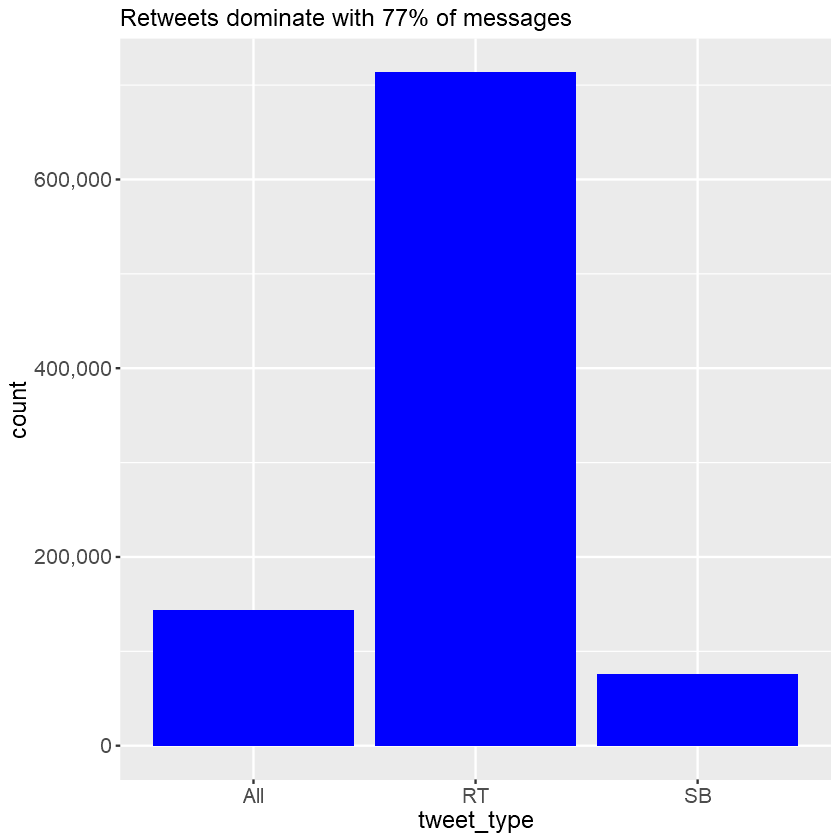

In [26]:
ggplot(aes(x = tweet_type), data = full_text_en_usa_cols) +
geom_bar(fill = "blue") +
ggtitle(label = "Retweets dominate with 77% of messages") +
scale_y_continuous(breaks = c(0, 200000, 400000, 600000), 
                   labels = c("0", "200,000", "400,000", "600,000")) +
plot.format

In [ ]:
##### Load count data for tweets

In [4]:
count.pos <- read.csv("Sentiment/count_pos.csv", 
         stringsAsFactors = FALSE)

In [6]:
str(count.pos)

'data.frame':	23979 obs. of  9 variables:
 $ yday           : int  221 221 221 221 221 221 221 221 221 221 ...
 $ location       : chr  "ATLANTA GA" "AUSTIN TX" "BALTIMORE MD" "BEAVERTON OR" ...
 $ count          : int  7 2 2 2 2 1 2 1 4 1 ...
 $ positive.counts: int  2 0 0 0 0 0 1 0 1 0 ...
 $ negative.counts: int  4 1 2 1 1 0 0 0 2 1 ...
 $ neutral.counts : int  1 1 0 1 1 1 1 1 1 0 ...
 $ lon            : num  -84.4 -97.7 -76.6 -122.8 -71.1 ...
 $ lat            : num  33.7 30.3 39.3 45.5 42.4 ...
 $ time           : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
###### Distribution of tweet time

count.pos$ymd <- lubridate::as_date(count.pos$yday, origin = lubridate::origin) + years(44) - days(1) #format = "%Y-%m-%d")

In [76]:
daily.tweets <- full_text_en_usa_cols %>% dplyr::select(one_of(c("ymd")))  %>%
                            group_by(ymd) %>%
                                    summarise(num_tweets = n()) %>%
                            as.data.frame()

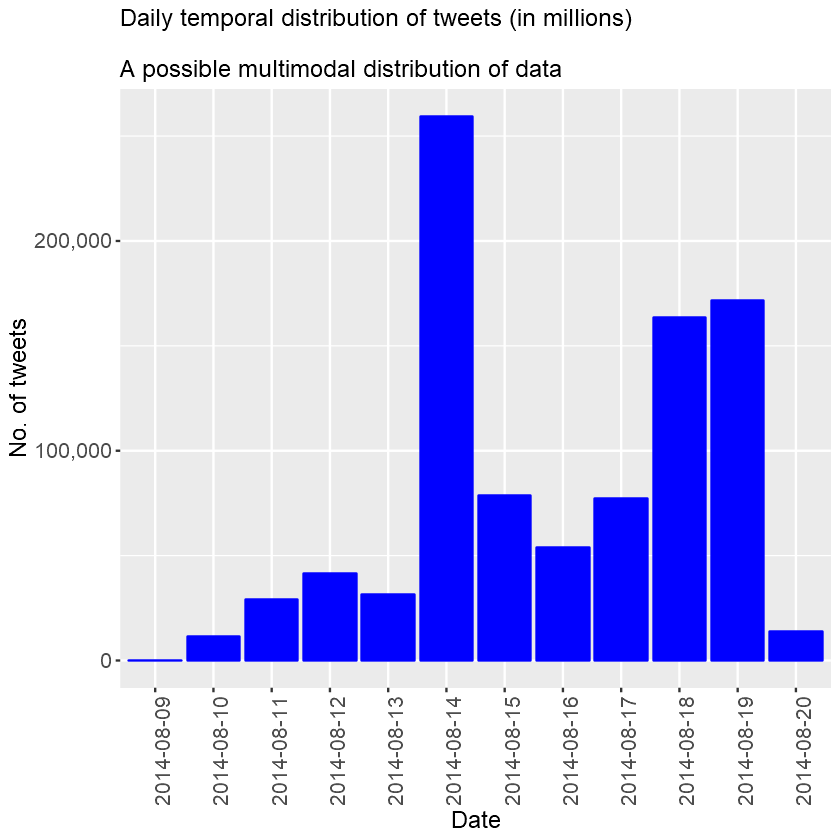

In [78]:
ggplot(aes(x = ymd, y = num_tweets), data = daily.tweets) +
  geom_bar(color = "blue", fill = "blue", stat = "identity") + 
  labs(title = "Daily temporal distribution of tweets (in millions)\n 
A possible multimodal distribution of data", y = "No. of tweets", 
x= "Date") + 
scale_y_continuous(breaks = c(0, 100000, 200000, 300000), 
                   labels = c("0", "100,000", "200,000", "300,000")) +  
plot.format +
     theme(axis.text.x=element_text(angle=90))

In [ ]:
###### Better look at the above graph to determine cycles

In [80]:
daily.tweets.line <- full_text_en_usa_cols %>%
                dplyr::select(one_of(c("ymd", "retweet"))) %>%
                        group_by(ymd,retweet) %>%
                        summarise(n =n()) %>%                        
                ungroup() %>%
                mutate(retweet = as.character(retweet)) %>%
                as.data.frame()

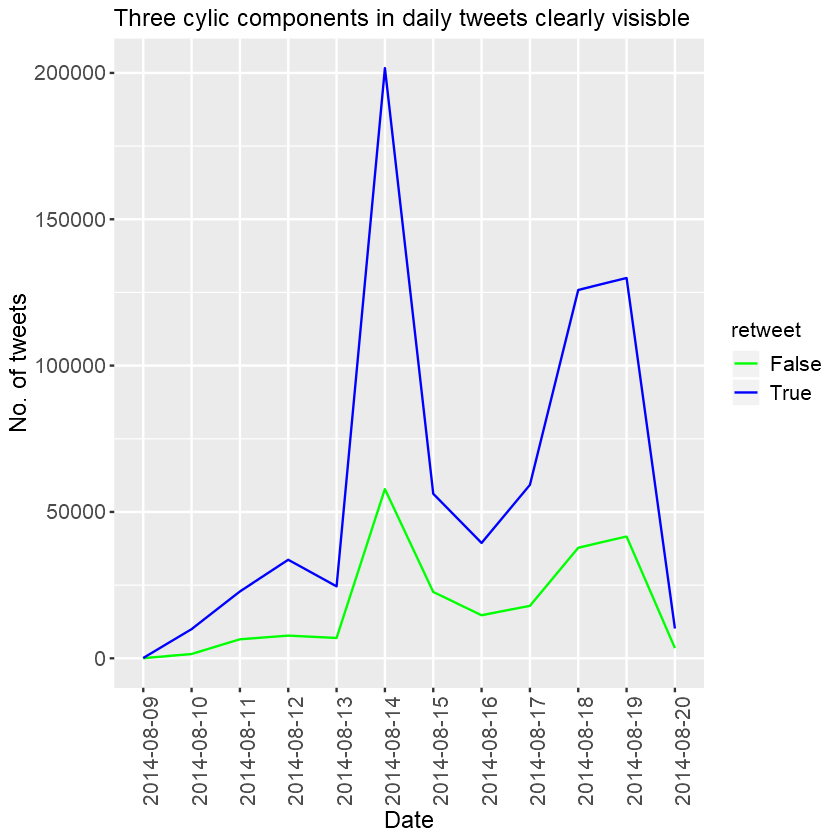

In [81]:
ggplot(aes(x = ymd, y = n, group = retweet), data = daily.tweets.line) +
  geom_line(aes(color = retweet)) + 
  labs(title = "Three cylic components in daily tweets clearly visisble", y = "No. of tweets", x= "Date") + 
  plot.format +
     theme(axis.text.x=element_text(angle=90)) +
scale_color_manual(values = c("green", "blue"), breaks = c("0", "1"), labels = c("False", "True")) +
guides(fill=guide_legend(title="Retweet"))


In [ ]:
##### Verify the time series components of the data

In [49]:
tweet_data.ts <- xts::xts(log10(daily.tweets$num_tweets), 
                          order.by = ymd(daily.tweets$ymd))

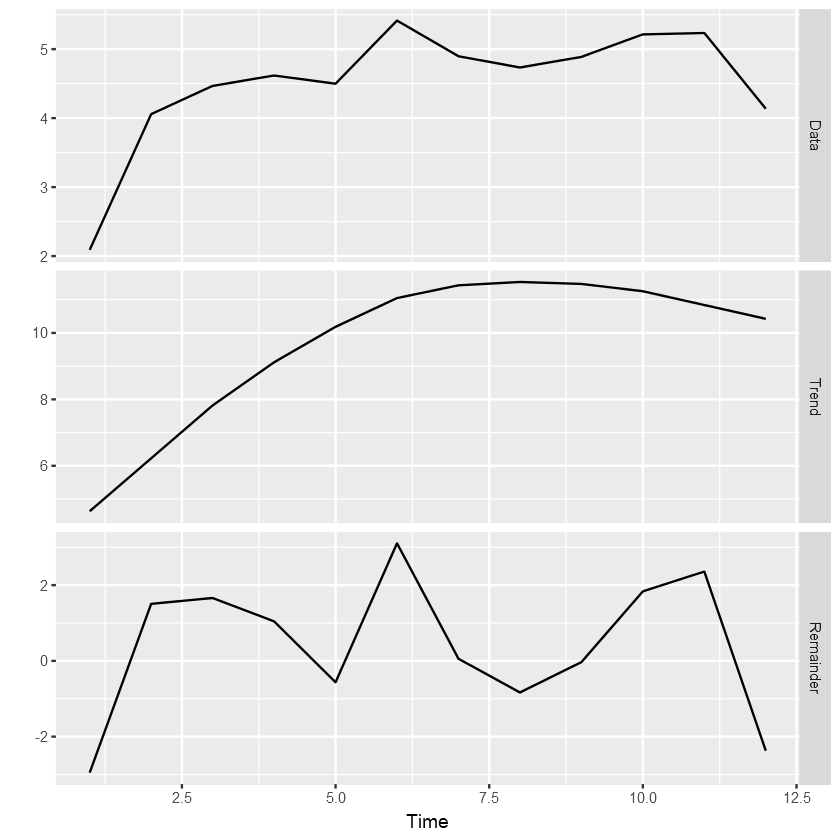

In [58]:
mstl(tweet_data.ts, lambda='auto') %>% autoplot(facet=TRUE)

Varying cycles in the data. Examining the output of mstl shows that the cycles cannot be separated from the random noise. However once the trend is removed, the remainder component indicates that the data has no seasonality (periodic/fixed time pattern). The graph however clearly displays a cyclic component (non-fixed time patterns)
cycles + random noise = random populations (groupings) in time.

These populations can be split into the following time windows - 5, 3 and 4 day "cycles", or three 4 day "cycles".

Speak about other methods of examining spatiotemporal or temporal cyclic data.

#### Spatial or locations of tweets

###### Locations of popular tweets

In [66]:
NROW(subset(full_text_en_usa_cols$City_code, 
            is.na(full_text_en_usa_cols$City_code)))

[1] 0

In [62]:
user.location <- full_text_en_usa_cols %>%
                dplyr::select(one_of(c("City_code"))) %>%
                group_by(City_code) %>%
                        summarise(num_tweets = n()) %>%
                arrange(desc(num_tweets)) %>%
                ungroup() %>%
                as.data.frame()

In [104]:
summary(user.location$num_tweets)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     5.0   130.3    22.0 70132.0 

In [67]:
user.location <- transform(user.location, City_code = 
                           reorder(City_code, -num_tweets))

In [ ]:
Title % of tweets cities or states

In [80]:
sum(subset(user.location, num_tweets > 10000 & City_code != 
           "ST LOUIS MO")$num_tweets)/sum(subset(user.location, 
                            City_code != "ST LOUIS MO")$num_tweets)
                                    

[1] 0.3788415

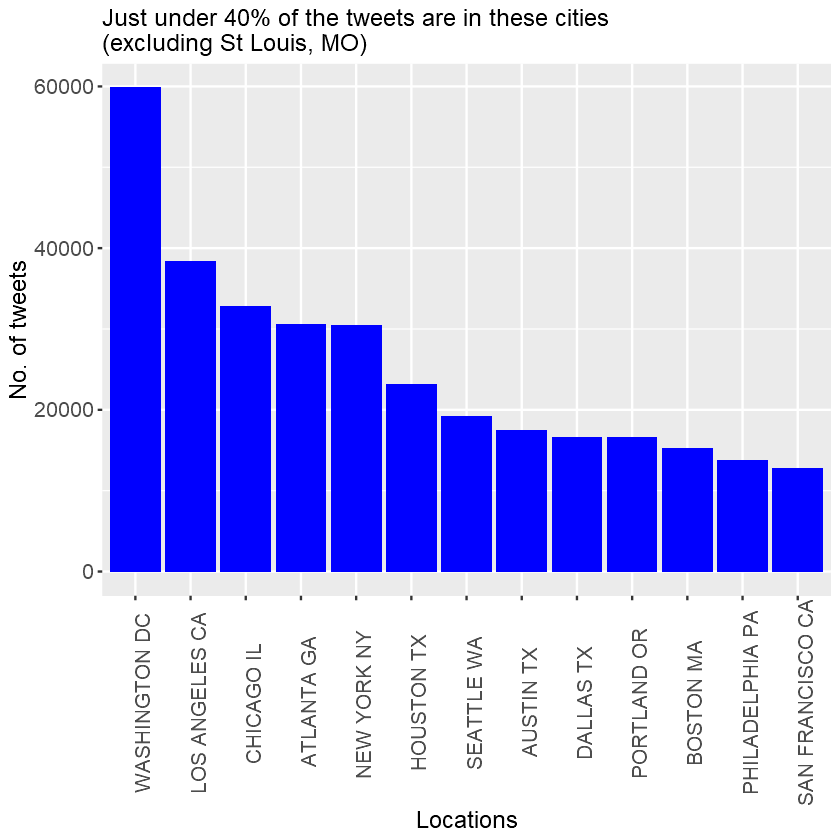

In [90]:
ggplot(aes(x = City_code, y=num_tweets), data = subset(user.location, 
                                                       num_tweets > 
                                                       10000 & 
                                                       City_code != 
                                                       "ST LOUIS MO")) +
  geom_bar(fill = "blue", stat = "identity") + #, stat = "count") + 
       labs(title = "Just under 40% of the tweets are in these cities
(if St Louis, MO is excluded)", x = "Locations", y = "No. of tweets") + 
 theme(axis.text.x=element_text(angle=90)) +
       plot.format


In [ ]:
#### Plot tweet counts by geo-coordinates across the USA

In [119]:
tweets.latlon <- full_text_en_usa_cols %>% 
            dplyr::select(everything()) %>%
            filter(!(is.na(lon) & is.na(lat))) %>%
            group_by(City_code, lon, lat) %>%
            summarise(num_tweets = n()) %>%
            as.data.frame()

In [141]:
summary(tweets.latlon$lon, useNA = "ifany")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-165.40  -95.72  -87.74  -90.26  -80.59  -67.84 

In [173]:
subset(tweets.latlon, 
       duplicated(tweets.latlon[c("City_code", "num_tweets")]))

,City_code,lon,lat,num_tweets
294,BARDSTOWN KY,-85.45969,37.81165,30
321,BATH ME,-69.81930,43.91071,1
867,CEDAR HILL TX,-96.95681,32.58888,56
1169,CORINTH KY,-84.56376,38.49706,1
1668,FAIRVIEW NJ,-74.08601,40.37355,1
1669,FAIRVIEW NJ,-73.99844,40.81270,1
1814,FRANKLIN WI,-88.03854,42.88852,2
2035,GREEN TREE PA,-75.49393,40.03794,1
2056,GREENVILLE NY,-73.81920,40.99348,2
2657,LA GRANGE IL,-87.86953,41.80527,2


In [118]:
tweets.latlon %>% filter(num_tweets >= 0) %>%
                    group_by(City_code) %>% 
distinct(City_code, num_tweets) %>%
                       nrow(.)

ERROR: Error in eval(lhs, parent, parent): object 'tweets.latlon' not found


In [154]:
head(t1)

City_code,lon,lat,num_tweets
ABBEVILLE SC,-82.37889,34.17852,2
ABERDEEN MD,-76.16344,39.50981,5
ABERDEEN NC,-79.42922,35.13200,2
ABERDEEN SD,-98.48273,45.46180,21
ABERDEEN WA,-123.81814,46.97494,46
ABERNATHY TX,-101.84559,33.82932,1


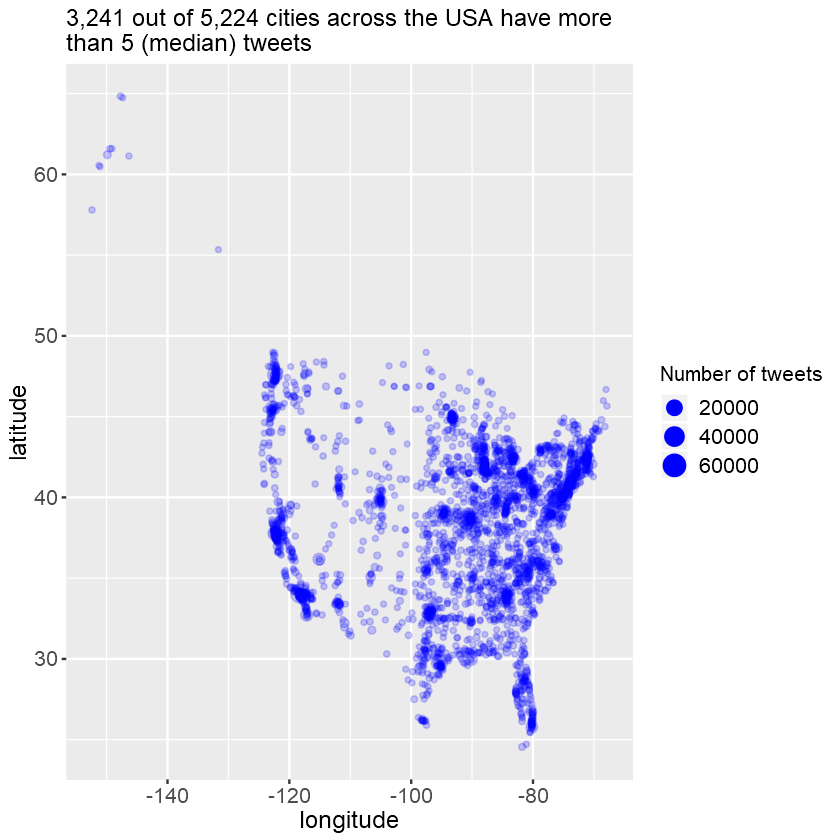

In [120]:
ggplot(aes(y=lat, x=lon), data = subset(tweets.latlon, num_tweets >= 5)) +
    geom_point(aes(size = num_tweets), alpha = 0.2, color = "blue") +
    labs(title = "3,241 out of 5,224 cities across the USA have more
than 5 (median) tweets ", x = "longitude", y = "latitude") +
    plot.format +
#scale_alpha(range = c(1,1)) +
guides(size=guide_legend(title="Number of tweets", override.aes = list(alpha = 1)))

In [121]:
tweets.latlon %>% filter(num_tweets >= 1000) %>%
                    group_by(City_code) %>%
                        nrow(.)

[1] 113

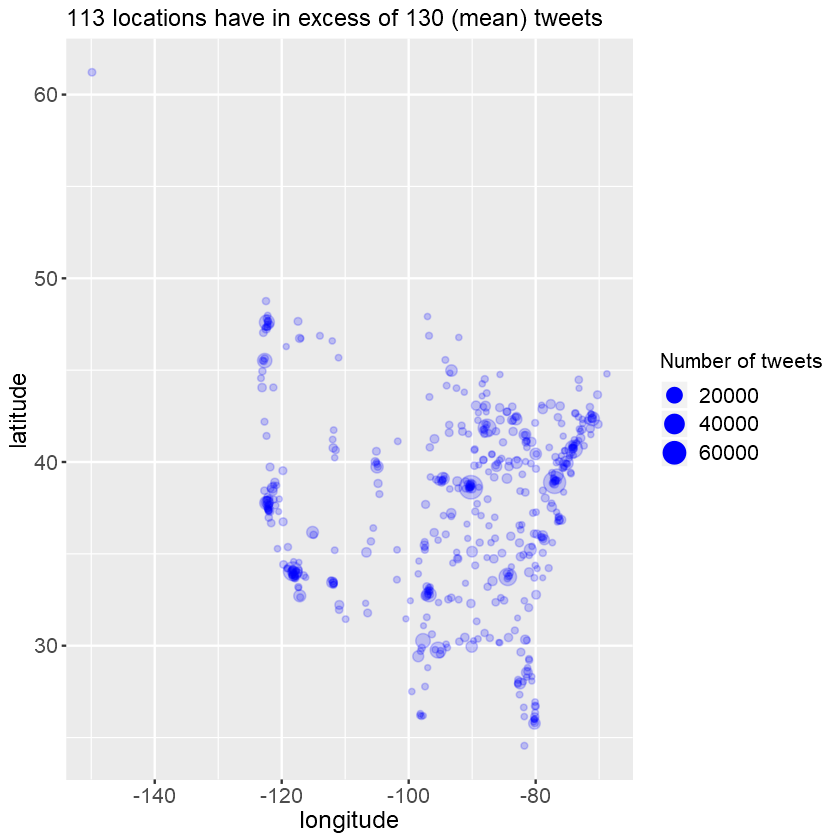

In [122]:
ggplot(aes(y=lat, x=lon), data = subset(tweets.latlon, 
                                        num_tweets >= 130)) +
    geom_point(aes(size = num_tweets), alpha = 0.2, color = "blue") +
    labs(title = "113 locations have in excess of 130 (mean) tweets", 
         x = "longitude", y = "latitude") +
    plot.format +
#scale_alpha(range = c(1,1)) +
guides(size=guide_legend(title="Number of tweets", override.aes = list(alpha = 1)))

In [ ]:
##### Test if 

In [123]:
tweet.anova <- full_text_en_usa_cols %>% dplyr::select(everything()) %>%
                    mutate(time_group = ifelse(between(full_text_en_usa_cols$ymd, "2014-08-09", "2014-08-13"), "group1", 
                                               ifelse(between(full_text_en_usa_cols$ymd, 
                                                      "2014-08-14", "2014-08-16"),"group2", "group3"))) %>%
                 
                as.data.frame()

In [91]:
str(tweet.anova)

'data.frame':	932321 obs. of  40 variables:
 $ rowno                      : num  1 2 4 5 17 18 25 32 38 43 ...
 $ user.location              : chr  "Columbus, OH" "Atlanta, GA" "Columbus, OH" "Atlanta, GA" ...
 $ created_at                 : chr  "Sat Aug 09 22:33:06 +0000 2014" "Sat Aug 09 22:59:13 +0000 2014" "Sat Aug 09 22:28:42 +0000 2014" "Sat Aug 09 23:03:05 +0000 2014" ...
 $ id                         : num  4.98e+17 4.98e+17 4.98e+17 4.98e+17 4.98e+17 ...
 $ retweeted                  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ retweeted_count            : logi  NA NA NA NA NA NA ...
 $ retweet                    : int  0 0 0 0 1 1 1 0 1 0 ...
 $ retweeted_status.created_at: chr  "" "" "" "" ...
 $ favorited                  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favorite_count             : int  107 1 10 2 0 0 0 0 0 3 ...
 $ textnum                    : num  1 2 4 5 17 18 25 32 38 43 ...
 $ full_text                  : chr  "Black teenage boys are not men. 

In [124]:
tweet.anova.time <- aov(n ~ time_group, data = tweet.anova)

In [125]:
summary(tweet.anova.time)

                Df    Sum Sq   Mean Sq F value Pr(>F)    
time_group       2 5.165e+11 2.582e+11   18356 <2e-16 ***
Residuals   932318 1.312e+13 1.407e+07                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

At least one of the means in the three sample groups is sigificantly different suggesting different populations.

###### Measure the difference between each pair of groups using TukeyHSD

In [126]:
TukeyHSD(tweet.anova.time)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = n ~ time_group, data = tweet.anova)

$time_group
                   diff       lwr       upr p adj
group2-group1 2407.7056 2378.1140 2437.2972     0
group3-group1 1720.7820 1691.4534 1750.1107     0
group3-group2 -686.9236 -706.3727 -667.4744     0


In [ ]:
There is a difference bewteen the sample means of all three groups. 
The p-value = 0. 
Accept alternative hypothesis.

In [ ]:
####### Do anova test on time and location

In [127]:
tweet.anova.loc <- aov(n ~ lon + lat + time_group, data = tweet.anova)

In [128]:
summary(tweet.anova.loc)

                Df    Sum Sq   Mean Sq F value Pr(>F)    
lon              1 1.375e+11 1.375e+11    9774 <2e-16 ***
lat              1 3.326e+10 3.326e+10    2364 <2e-16 ***
time_group       2 5.376e+11 2.688e+11   19105 <2e-16 ***
Residuals   902720 1.270e+13 1.407e+07                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
29596 observations deleted due to missingness

In [130]:
9774/2364

[1] 4.134518

All three factors longitude and latitude (location), and 
time_group (time) are statiscally significant. 
The F-statistic for longitude < than for time_group, hence time 
appears to have a greater impact on the tweet activity. Likewise the statistic for latitude is a quarter of longitude 2364 vs. 9774. Longitude has a greater spatial impact on the amount of tweet activity seen over the 12 days.
The statistics for time_group increases slightly from 18356 to 19105 when geocodes were included in the anova. Therefore the time aspect remains significant when the test is updated to two-way anova.
At least one of the means in the three samples is sigificantly 
different suggesting different populations

This EDA looked at different aspects of the data in order to confirms its spatiotemporal properties.
The suggestion of different populations in the data in space and time
makes it an ideal candidate for spationtemporal scan statistics (STSS) techniques.

###################### EDA #####################################